In [0]:
import pandas as pd


In [0]:
##Remove null from data#

In [0]:
jkse = pd.read_csv('data/JKSE.csv')

In [0]:
#Check null

In [5]:
jkse.isnull().sum()

Date           0
Open         307
High         307
Low          307
Close        307
Adj Close    307
Volume       307
dtype: int64

In [0]:
jkse = jkse.dropna()

In [0]:
jkse.to_csv("data/JKSE_CLEAN.csv")

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from random import seed

In [0]:
seed(0)
data = pd.read_csv('data/JKSE_CLEAN.csv',header=0, usecols=['Date', 'Close'],parse_dates=True,index_col='Date')

In [10]:
data.head()

,Close
Date,
1990-04-06,641.268982
1990-04-09,633.481995
1990-04-10,632.085999
1990-04-11,634.692993
1990-04-12,639.614014


In [0]:
#Data scaling

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
sc = MinMaxScaler()
data_scaled = sc.fit_transform(data)

In [0]:
#Data splitting

In [0]:
np.random.seed(7)

train_len = int(len(data_scaled) * 0.70)
test_len = len(data_scaled) - train_len
train_data = data_scaled[0:train_len, :]
test_data = data_scaled[train_len:len(data_scaled), :]

In [16]:
# Check

print(len(train_data), len(test_data))

5131 2200


In [0]:
def dataset_creator(data, time_step=1):
	data_x, data_y = [], []
	for i in range(len(data)-time_step-1):
		a = data[i:(i+time_step), 0]
		data_x.append(a)
		data_y.append(data[i + time_step, 0])
	return np.array(data_x), np.array(data_y)


In [18]:
time_step = 1
train_x, train_y = dataset_creator(train_data, time_step)
test_x, test_y = dataset_creator(test_data, time_step)

print(test_y)

[0.53439603 0.53885208 0.53770146 ... 0.66743825 0.65616503 0.66631777]


In [19]:
#create tensor for train and test data

train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

print(train_x.shape)
print(test_x.shape)

(5129, 1, 1)
(2198, 1, 1)


In [20]:
#Create LSTM Model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(256, input_shape=(1, 1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, epochs=100, batch_size=1, verbose=1)
model.summary()
model.save('saved_model/my_model') 

Epoch 1/100
5129/5129 [==============================] - 14s 3ms/step - loss: 0.0042 - accuracy: 1.9497e-04
Epoch 2/100
5129/5129 [==============================] - 14s 3ms/step - loss: 2.7418e-04 - accuracy: 1.9497e-04
Epoch 3/100
5129/5129 [==============================] - 14s 3ms/step - loss: 1.8167e-04 - accuracy: 1.9497e-04
Epoch 4/100
5129/5129 [==============================] - 14s 3ms/step - loss: 1.7365e-04 - accuracy: 1.9497e-04
Epoch 5/100
5129/5129 [==============================] - 14s 3ms/step - loss: 1.7030e-04 - accuracy: 1.9497e-04
Epoch 6/100
5129/5129 [==============================] - 14s 3ms/step - loss: 1.5477e-04 - accuracy: 1.9497e-04
Epoch 7/100
5129/5129 [==============================] - 14s 3ms/step - loss: 1.2993e-04 - accuracy: 1.9497e-04
Epoch 8/100
5129/5129 [==============================] - 14s 3ms/step - loss: 8.3488e-05 - accuracy: 1.9497e-04
Epoch 9/100
5129/5129 [==============================] - 14s 3ms/step - loss: 4.5879e-05 - accuracy: 1.9497e

In [21]:
score = model.evaluate(train_x, train_y, verbose=0)
print('Keras Model Loss = ',score[0])
print('Keras Model Accuracy = ',score[1])

Keras Model Loss =  1.5366600564448163e-05
Keras Model Accuracy =  0.00019496977620292455


In [0]:
#Test Predict
train_prediction = model.predict(train_x)
test_prediction = model.predict(test_x)

#inverse scalar function
train_prediction = sc.inverse_transform(train_prediction)
train_y = sc.inverse_transform([train_y])

test_prediction = sc.inverse_transform(test_prediction)
test_y = sc.inverse_transform([test_y])



In [0]:
#Split data to Create graph
train_predict_plot = np.empty_like(data_scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[1:len(train_prediction)+1, :] = train_prediction

test_predict_plot = np.empty_like(data_scaled)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_prediction)+(1*2)+1:len(data_scaled)-1, :] = test_prediction


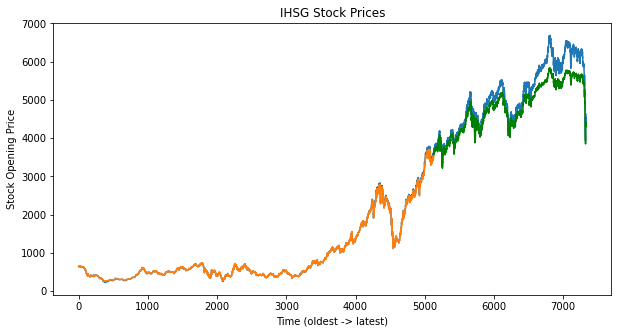

In [28]:
#Create graph
plt.figure(figsize=(10,5))
plt.title("IHSG Stock Prices")
plt.plot(sc.inverse_transform(data_scaled))
plt.plot(train_predict_plot)
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Opening Price")
plt.plot(test_predict_plot, color='g')
plt.show()


plt.show()
